In [22]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Please see the report to understand the meaning of the variables and where the formulae are coming from.

# Config and Functions

In [2]:
plot_dir = '/data/user/boiger_r/invertible_network_paper_results5000/models_30_11_2020/isodar/optimisation_paper_7/plots'

In [3]:
dpi = 300

In [4]:
def speedup(n_g, t_t, t_o, t_p):
    return n_g * t_o / (t_o + t_t + n_g * t_p)

def cost(n, n_g, n_i, n_h, t_t, t_o, t_p, r_o, r_t):
    return n_g * n_i * t_o * r_o / (n * t_o * r_o + n_h * t_t * r_t + n_g * n_i * t_p * r_t)

In [5]:
# all times are given in s
awa_n = 21_000
awa_n_h = 100
awa_n_g = 1000
awa_n_i = 200
awa_t_t = 49 * 3600
awa_t_o = 10 * 60
awa_t_p = 0.021
awa_r_o = 4
awa_r_t = 12

In [6]:
# all times are given in s
isodar_n = 5000
isodar_n_h = 120
isodar_n_g = 1000
isodar_n_i = 300
isodar_t_t = 3611.22553563118 
#isodar_t_o = 1354.47360869565
#isodar_r_o = 8
isodar_t_o = 6419.896875
isodar_r_o = 1
isodar_t_p = 2.6e-5
isodar_r_t = 1

In [7]:
isodar_t_p

2.6e-05

In [48]:
n_optims = range(1, 1000)

awa_speedups = [speedup(i*awa_n_g, awa_t_t, awa_t_o, awa_t_p) for i in n_optims]
awa_costs = [cost(awa_n, i*awa_n_g, awa_n_i, awa_n_h, awa_t_t, awa_t_o, awa_t_p, awa_r_o, awa_r_t) for i in n_optims]

isodar_speedups = [speedup(i*isodar_n_g, isodar_t_t, isodar_t_o, isodar_t_p) for i in n_optims]
isodar_costs = [cost(isodar_n, i*isodar_n_g, isodar_n_i, isodar_n_h, isodar_t_t, isodar_t_o, isodar_t_p, isodar_r_o, isodar_r_t) for i in n_optims]

# AWA

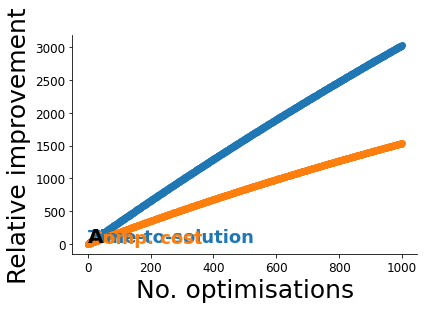

In [49]:
fig, ax = plt.subplots()

labelsize = 25

ax.plot(n_optims, awa_speedups, linewidth=3, marker='o')
ax.plot(n_optims, awa_costs, linewidth=3, marker='o')

ax.set_xlabel('No. optimisations', fontsize=labelsize)
ax.set_ylabel('Relative improvement', fontsize=labelsize)
ax.tick_params(labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(x=2,
        y=22.5,
        s='Time-to-solution',
        fontsize=18,
        fontweight='bold',
        color=sns.color_palette()[0])
ax.text(x=6.2,
        y=8,
        s='Comp. cost',
        fontsize=18,
        fontweight='bold',
        color=sns.color_palette()[1])

ax.text(x=1,
        y=28,
        s='A',
        fontsize=20,
        fontweight='bold')

#ax.grid(True)
fig.tight_layout()
fig.savefig(f'{plot_dir}/speedupAWA.jpg', dpi=dpi)

In [50]:
awa_speedups

[3.3894283729049097,
 6.778052665469211,
 10.16587316378916,
 13.552890153825302,
 16.93910392140256,
 20.32451475221029,
 23.7091229318024,
 27.092928745597398,
 30.475932478878487,
 33.85813441679363,
 37.239534844355674,
 40.62013404644235,
 43.99993230779645,
 47.37892991302582,
 50.7571271466035,
 54.13452429286777,
 57.51112163602226,
 60.88691946013598,
 64.26191804914346,
 67.63611768684477,
 71.00951865690567,
 74.38212124285762,
 77.7539257280979,
 81.12493239588967,
 84.49514152936206,
 87.86455341151026,
 91.23316832519556,
 94.60098655314549,
 97.96800837795382,
 101.33423408208073,
 104.69966394785281,
 108.0642982574632,
 111.42813729297158,
 114.7911813363044,
 118.15343066925479,
 121.51488557348276,
 124.87554633051519,
 128.23541322174603,
 131.59448652843622,
 134.9527665317139,
 138.31025351257443,
 141.66694775188046,
 145.02284953036204,
 148.3779591286167,
 151.7322768271095,
 155.0858029061731,
 158.43853764600786,
 161.79048132668194,
 165.14163422813138,
 168

In [51]:
awa_speedups_shift = np.hstack([0, np.array(awa_speedups[0:-1])])
awa_speedups_shift

array([   0.        ,    3.38942837,    6.77805267,   10.16587316,
         13.55289015,   16.93910392,   20.32451475,   23.70912293,
         27.09292875,   30.47593248,   33.85813442,   37.23953484,
         40.62013405,   43.99993231,   47.37892991,   50.75712715,
         54.13452429,   57.51112164,   60.88691946,   64.26191805,
         67.63611769,   71.00951866,   74.38212124,   77.75392573,
         81.1249324 ,   84.49514153,   87.86455341,   91.23316833,
         94.60098655,   97.96800838,  101.33423408,  104.69966395,
        108.06429826,  111.42813729,  114.79118134,  118.15343067,
        121.51488557,  124.87554633,  128.23541322,  131.59448653,
        134.95276653,  138.31025351,  141.66694775,  145.02284953,
        148.37795913,  151.73227683,  155.08580291,  158.43853765,
        161.79048133,  165.14163423,  168.49199663,  171.84156881,
        175.19035105,  178.53834364,  181.88554684,  185.23196093,
        188.57758621,  191.92242294,  195.2664714 ,  198.60973

In [52]:
linear_a_awa = awa_speedups-awa_speedups_shift
linear_a_awa

array([3.38942837, 3.38862429, 3.3878205 , 3.38701699, 3.38621377,
       3.38541083, 3.38460818, 3.38380581, 3.38300373, 3.38220194,
       3.38140043, 3.3805992 , 3.37979826, 3.37899761, 3.37819723,
       3.37739715, 3.37659734, 3.37579782, 3.37499859, 3.37419964,
       3.37340097, 3.37260259, 3.37180449, 3.37100667, 3.37020913,
       3.36941188, 3.36861491, 3.36781823, 3.36702182, 3.3662257 ,
       3.36542987, 3.36463431, 3.36383904, 3.36304404, 3.36224933,
       3.3614549 , 3.36066076, 3.35986689, 3.35907331, 3.35828   ,
       3.35748698, 3.35669424, 3.35590178, 3.3551096 , 3.3543177 ,
       3.35352608, 3.35273474, 3.35194368, 3.3511529 , 3.3503624 ,
       3.34957218, 3.34878224, 3.34799258, 3.3472032 , 3.3464141 ,
       3.34562527, 3.34483673, 3.34404846, 3.34326048, 3.34247277,
       3.34168534, 3.34089819, 3.34011131, 3.33932472, 3.3385384 ,
       3.33775236, 3.33696659, 3.33618111, 3.3353959 , 3.33461097,
       3.33382632, 3.33304194, 3.33225784, 3.33147402, 3.33069

In [53]:
S_rel_AWA = 1-1/awa_speedups[0]
S_rel_AWA

0.7049650000000001

In [54]:
awa_costs

[1.831149687331191,
 3.661595357097087,
 5.491337415227479,
 7.320376267340142,
 9.148712318741136,
 10.976345974425113,
 12.803277639075603,
 14.629507717065321,
 16.455036612456464,
 18.279864729001005,
 20.103992470141,
 21.92742023900888,
 23.75014843842774,
 25.572177470911647,
 27.393507738665935,
 29.214139643587497,
 31.034073587265077,
 32.85330997097957,
 34.67184919570434,
 36.48969166210546,
 38.30683777054204,
 40.12328792106655,
 41.93904251342505,
 43.754101947057535,
 45.5684666210982,
 47.38213693437574,
 49.19511328541365,
 51.0073960724305,
 52.81898569334025,
 54.62988254575253,
 56.4400870269729,
 58.2495995340032,
 60.05842046354181,
 61.86655021198391,
 63.67398917542184,
 65.48073774964531,
 67.28679633014175,
 69.09216531209658,
 70.89684509039348,
 72.70083605961469,
 74.50413861404131,
 76.30675314765357,
 78.10868005413113,
 79.90991972685336,
 81.71047255889964,
 83.51033894304958,
 85.30951927178343,
 87.10801393728222,
 88.90582333142821,
 90.702947845804

In [55]:
awa_costs_shift = np.hstack([0,np.array(awa_costs[0:-1])])
awa_costs_shift

array([   0.        ,    1.83114969,    3.66159536,    5.49133742,
          7.32037627,    9.14871232,   10.97634597,   12.80327764,
         14.62950772,   16.45503661,   18.27986473,   20.10399247,
         21.92742024,   23.75014844,   25.57217747,   27.39350774,
         29.21413964,   31.03407359,   32.85330997,   34.6718492 ,
         36.48969166,   38.30683777,   40.12328792,   41.93904251,
         43.75410195,   45.56846662,   47.38213693,   49.19511329,
         51.00739607,   52.81898569,   54.62988255,   56.44008703,
         58.24959953,   60.05842046,   61.86655021,   63.67398918,
         65.48073775,   67.28679633,   69.09216531,   70.89684509,
         72.70083606,   74.50413861,   76.30675315,   78.10868005,
         79.90991973,   81.71047256,   83.51033894,   85.30951927,
         87.10801394,   88.90582333,   90.70294785,   92.49938787,
         94.2951438 ,   96.09021602,   97.88460493,   99.67831091,
        101.47133435,  103.26367564,  105.05533518,  106.84631

In [56]:
linear_a_awacost = awa_costs - awa_costs_shift
linear_a_awacost

array([1.83114969, 1.83044567, 1.82974206, 1.82903885, 1.82833605,
       1.82763366, 1.82693166, 1.82623008, 1.8255289 , 1.82482812,
       1.82412774, 1.82342777, 1.8227282 , 1.82202903, 1.82133027,
       1.8206319 , 1.81993394, 1.81923638, 1.81853922, 1.81784247,
       1.81714611, 1.81645015, 1.81575459, 1.81505943, 1.81436467,
       1.81367031, 1.81297635, 1.81228279, 1.81158962, 1.81089685,
       1.81020448, 1.80951251, 1.80882093, 1.80812975, 1.80743896,
       1.80674857, 1.80605858, 1.80536898, 1.80467978, 1.80399097,
       1.80330255, 1.80261453, 1.80192691, 1.80123967, 1.80055283,
       1.79986638, 1.79918033, 1.79849467, 1.79780939, 1.79712451,
       1.79644003, 1.79575593, 1.79507222, 1.79438891, 1.79370598,
       1.79302344, 1.7923413 , 1.79165954, 1.79097817, 1.79029719,
       1.7896166 , 1.78893639, 1.78825658, 1.78757715, 1.78689811,
       1.78621945, 1.78554118, 1.7848633 , 1.7841858 , 1.78350869,
       1.78283197, 1.78215563, 1.78147967, 1.7808041 , 1.78012

In [63]:
600000/21*1/3

9523.809523809525

In [57]:
C_rel_AWA = 1-1/awa_costs[0]
C_rel_AWA

0.45389500000000005

# IsoDAR

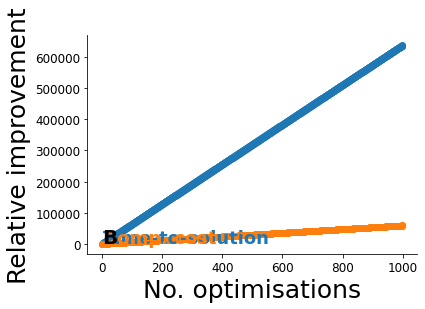

In [59]:
fig, ax = plt.subplots()

labelsize = 25

n_optims = range(1, 1000)

ax.plot(n_optims, isodar_speedups, linewidth=3, marker='o')
ax.plot(n_optims, isodar_costs, linewidth=3, marker='o')

ax.set_xlabel('No. optimisations', fontsize=labelsize)
ax.set_ylabel('Relative improvement', fontsize=labelsize)
ax.tick_params(labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(x=2,
        y=2000,
        s='Time-to-solution',
        fontsize=18,
        fontweight='bold',
        color=sns.color_palette()[0])
ax.text(x=6.2,
        y=1000,
        s='Comp. cost',
        fontsize=18,
        fontweight='bold',
        color=sns.color_palette()[1])
ax.text(x=1,
        y=2500,
        s='B',
        fontsize=20,
        fontweight='bold')

fig.tight_layout()
fig.savefig(f'{plot_dir}/speedupISODAR.jpg', dpi=dpi)

In [60]:
isodar_speedups

[639.9962010527214,
 1279.9890844677375,
 1919.978650270845,
 2559.9648984878413,
 3199.9478291445225,
 3839.927442266684,
 4479.903737880124,
 5119.876716010636,
 5759.846376684018,
 6399.8127199260625,
 7039.775745762567,
 7679.735454219323,
 8319.691845322128,
 8959.644919096776,
 9599.594675569058,
 10239.54111476477,
 10879.484236709704,
 11519.424041429655,
 12159.360528950414,
 12799.293699297774,
 13439.223552497528,
 14079.150088575467,
 14719.073307557384,
 15358.993209469068,
 15998.909794336314,
 16638.82306218491,
 17278.733013040648,
 17918.639646929318,
 18558.542963876705,
 19198.44296390861,
 19838.339647050812,
 20478.233013329107,
 21118.123062769282,
 21758.009795397127,
 22397.89321123843,
 23037.773310318975,
 23677.650092664557,
 24317.523558300956,
 24957.393707253967,
 25597.26053954937,
 26237.12405521296,
 26876.984254270516,
 27516.84113674783,
 28156.694702670684,
 28796.54495206487,
 29436.391884956163,
 30076.23550137036,
 30716.07580133324,
 31355.912784

In [61]:
isodar_speedups_shift = np.hstack([0, np.array(isodar_speedups[0:-1])])
isodar_speedups_shift

array([     0.        ,    639.99620105,   1279.98908447,   1919.97865027,
         2559.96489849,   3199.94782914,   3839.92744227,   4479.90373788,
         5119.87671601,   5759.84637668,   6399.81271993,   7039.77574576,
         7679.73545422,   8319.69184532,   8959.6449191 ,   9599.59467557,
        10239.54111476,  10879.48423671,  11519.42404143,  12159.36052895,
        12799.2936993 ,  13439.2235525 ,  14079.15008858,  14719.07330756,
        15358.99320947,  15998.90979434,  16638.82306218,  17278.73301304,
        17918.63964693,  18558.54296388,  19198.44296391,  19838.33964705,
        20478.23301333,  21118.12306277,  21758.0097954 ,  22397.89321124,
        23037.77331032,  23677.65009266,  24317.5235583 ,  24957.39370725,
        25597.26053955,  26237.12405521,  26876.98425427,  27516.84113675,
        28156.69470267,  28796.54495206,  29436.39188496,  30076.23550137,
        30716.07580133,  31355.91278487,  31995.74645201,  32635.57680277,
        33275.40383719,  

In [62]:
linear_a_isodar = isodar_speedups-isodar_speedups_shift
linear_a_isodar

array([639.99620105, 639.99288342, 639.9895658 , 639.98624822,
       639.98293066, 639.97961312, 639.97629561, 639.97297813,
       639.96966067, 639.96634324, 639.96302584, 639.95970846,
       639.9563911 , 639.95307377, 639.94975647, 639.9464392 ,
       639.94312194, 639.93980472, 639.93648752, 639.93317035,
       639.9298532 , 639.92653608, 639.92321898, 639.91990191,
       639.91658487, 639.91326785, 639.90995086, 639.90663389,
       639.90331695, 639.90000003, 639.89668314, 639.89336628,
       639.89004944, 639.88673263, 639.88341584, 639.88009908,
       639.87678235, 639.87346564, 639.87014895, 639.8668323 ,
       639.86351566, 639.86019906, 639.85688248, 639.85356592,
       639.85024939, 639.84693289, 639.84361641, 639.84029996,
       639.83698354, 639.83366714, 639.83035076, 639.82703442,
       639.82371809, 639.8204018 , 639.81708553, 639.81376928,
       639.81045306, 639.80713687, 639.8038207 , 639.80050456,
       639.79718844, 639.79387235, 639.79055629, 639.78

In [16]:
S_rel_isodar = 1-1/isodar_speedups[0]
S_rel_isodar

0.9984374907251713

In [17]:
isodar_costs

[59.200767825233214,
 118.40150726278868,
 177.60221831268683,
 236.80290097494805,
 296.00355524959275,
 355.2041811366414,
 414.4047786361144,
 473.60534774803216,
 532.8058884724151]

In [36]:
isodar_costs_shift = np.hstack([0, np.array(isodar_costs[0:-1])])
isodar_costs_shift

array([  0.        ,  59.20076783, 118.40150726, 177.60221831,
       236.80290097, 296.00355525, 355.20418114, 414.40477864,
       473.60534775])

In [37]:
linear_a_isodarcost = isodar_costs-isodar_costs_shift
linear_a_isodarcost

array([59.20076783, 59.20073944, 59.20071105, 59.20068266, 59.20065427,
       59.20062589, 59.2005975 , 59.20056911, 59.20054072])

In [64]:
6.48e+9/26

249230769.23076922

In [18]:
C_rel_isodar = 1-1/isodar_costs[0]
C_rel_isodar

0.9831083271934563

# Combined

In [19]:
axis_label_size = 25
axis_tick_size = 14
line_width = 2.5
annotation_size = 20
subplot_letter_size = 25
markersize = 7
plot_dir ='/data/user/boiger_r/invertible_network_paper_results5000/models_30_11_2020/isodar/optimisation_paper_7/plots/plots_paper'


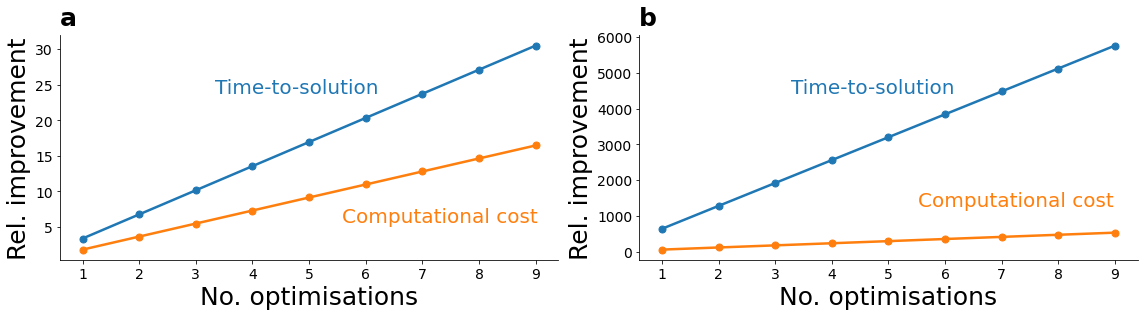

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4.5))
dpi = 500
labelsize = 25

ax = axes[0]

ax.plot(n_optims, awa_speedups, linewidth=line_width, marker='o', markersize = markersize)
ax.plot(n_optims, awa_costs, linewidth=line_width, marker='o', markersize = markersize)

ax.set_xlabel('No. optimisations', fontsize=axis_label_size)
ax.set_ylabel('Rel. improvement', fontsize=axis_label_size)
ax.tick_params(labelsize=axis_tick_size)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.text(x=0.19,
         y=0.7,
         s='Time-to-solution',
         fontsize=annotation_size,
         color=sns.color_palette()[0])
fig.text(x=0.3,
         y=0.3,
         s='Computational cost',
         fontsize=annotation_size,
         color=sns.color_palette()[1])

ax = axes[1]
ax.plot(n_optims, isodar_speedups, linewidth=line_width, marker='o', markersize= markersize)
ax.plot(n_optims, isodar_costs, linewidth=line_width, marker='o', markersize = markersize)

ax.set_xlabel('No. optimisations', fontsize=axis_label_size)
ax.set_ylabel('Rel. improvement', fontsize=axis_label_size)
ax.tick_params(labelsize=axis_tick_size)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.text(x=0.69,
         y=0.7,
         s='Time-to-solution',
         fontsize=annotation_size,
         color=sns.color_palette()[0])
fig.text(x=0.8,
         y=0.35,
         s='Computational cost',
         fontsize=annotation_size,
         color=sns.color_palette()[1])

#fig.text(x=0.07,
#         y=0.9,
#         s='A',
#         fontsize=20,
#         fontweight='bold')
#fig.text(x=0.57,
#         y=0.9,
#         s='B',
#         fontsize=20,
#         fontweight='bold')

for i, char in enumerate(['a', 'b']):
        axes.flatten()[i].set_title(char,
                                    loc='left',
                                    fontdict={
                                        'fontsize': subplot_letter_size,
                                        'fontweight': 'bold',
                                    },
                                    pad=10)

fig.tight_layout()
fig.savefig(f'{plot_dir}/speedups.jpg', dpi=dpi,bbox_inches='tight')

In [22]:
plot_dir

'/data/user/boiger_r/invertible_network_paper_results5000/models_30_11_2020/isodar/optimisation_paper_7/plots/plots_paper'